In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.datasets as dset
import torchvision.transforms as transforms

import torch.optim as optim
import torchvision.models as models

import PIL.Image as Image

In [2]:
image_size = (224,224)
data_transform=transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ])

In [3]:
train_data=dset.ImageFolder(root="D:\\vs\\taitan\\taitan\\train",transform=data_transform)
# 数据集长度
totallen = len(train_data)
print('train data length:',totallen)

train data length: 11866


In [4]:
trainlen = int(totallen*0.7)
vallen = totallen - trainlen
train_db,val_db=torch.utils.data.random_split(train_data,[trainlen,vallen])
print('train:',len(train_db),'validation:',len(val_db))

train: 8306 validation: 3560


In [5]:
# batch size
bs=32
# 训练集
train_loader=torch.utils.data.DataLoader(train_db,batch_size=bs, shuffle=True,num_workers=2)
# 验证集
val_loader=torch.utils.data.DataLoader(val_db,batch_size=bs, shuffle=True,num_workers=2)

In [6]:
def get_num_correct(out, labels):
    return out.argmax(dim=1).eq(labels).sum().item()

In [7]:
batch = next(iter(train_loader))

In [8]:
batch[1]

tensor([16, 35, 24, 33, 36,  0, 38, 30, 32, 35, 36,  8, 18,  0, 16, 38, 15, 33,
        13, 28,  2, 26,  2, 20, 18, 24,  1, 38, 13,  1,  1,  9])

In [9]:
resnet18 = models.resnet18(pretrained=True)

In [10]:
print(resnet18)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [11]:
train_data.classes

['hazardous_waste_dry_battery',
 'hazardous_waste_expired_drugs',
 'hazardous_waste_ointment',
 'kitchen_waste_bone',
 'kitchen_waste_eggshell',
 'kitchen_waste_fish_bone',
 'kitchen_waste_fruit_peel',
 'kitchen_waste_meal',
 'kitchen_waste_pulp',
 'kitchen_waste_tea',
 'kitchen_waste_vegetable',
 'other_garbage_bamboo_chopsticks',
 'other_garbage_cigarette',
 'other_garbage_fast_food_box',
 'other_garbage_flowerpot',
 'other_garbage_soiled_plastic',
 'other_garbage_toothpick',
 'recyclables_anvil',
 'recyclables_bag',
 'recyclables_bottle',
 'recyclables_can',
 'recyclables_cardboard',
 'recyclables_cosmetic_bottles',
 'recyclables_drink_bottle',
 'recyclables_edible_oil_barrel',
 'recyclables_glass_cup',
 'recyclables_metal_food_cans',
 'recyclables_old_clothes',
 'recyclables_paper_bags',
 'recyclables_pillow',
 'recyclables_plastic_bowl',
 'recyclables_plastic_hanger',
 'recyclables_plug_wire',
 'recyclables_plush_toys',
 'recyclables_pot',
 'recyclables_powerbank',
 'recyclables_s

In [12]:
model = resnet18
n_classes = len(train_data.classes)
model.fc = nn.Linear(512, n_classes)

In [13]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [14]:
import torch.nn.init as init

for name, module in model._modules.items():
    if(name=='fc'):
        # print(module.weight.shape)
        init.kaiming_uniform_(module.weight, a=0, mode='fan_in')

In [15]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [16]:
optimizer=torch.optim.SGD(model.parameters(),lr=0.01)
epoch_num = 5
model = model.to(device)
for epoch in range(epoch_num):
    total_loss=0
    total_correct=0
    val_correct=0
    for batch in train_loader:#GetBatch
        images,labels=batch
        images = images.to(device)
        labels = labels.to(device)
        outs=model(images)#PassBatch
        loss=F.cross_entropy(outs,labels)#CalculateLoss
        optimizer.zero_grad()
        loss.backward()#CalculateGradients
        optimizer.step()#UpdateWeights
        total_loss+=loss.item()
        total_correct+=get_num_correct(outs,labels)
    for batch in val_loader:
        images,labels=batch
        images = images.to(device)
        labels = labels.to(device)
        outs=model(images)
        val_correct+=get_num_correct(outs,labels)
    print("loss:",total_loss,"train_correct:",total_correct/trainlen, "val_correct:",val_correct/vallen)

loss: 401.3538728952408 train_correct: 0.5924632795569468 val_correct: 0.7435393258426967
loss: 147.16191789507866 train_correct: 0.8489044064531663 val_correct: 0.7831460674157303
loss: 83.91423000395298 train_correct: 0.9219841078738261 val_correct: 0.7957865168539325
loss: 48.38707301393151 train_correct: 0.9668914038044787 val_correct: 0.8019662921348315
loss: 29.01886761933565 train_correct: 0.9879605104743558 val_correct: 0.8134831460674158


In [28]:
torch.save(model, 'chdig.pth')

In [18]:
for param in model.parameters():
    print(param.shape, param.nelement())

torch.Size([64, 3, 7, 7]) 9408
torch.Size([64]) 64
torch.Size([64]) 64
torch.Size([64, 64, 3, 3]) 36864
torch.Size([64]) 64
torch.Size([64]) 64
torch.Size([64, 64, 3, 3]) 36864
torch.Size([64]) 64
torch.Size([64]) 64
torch.Size([64, 64, 3, 3]) 36864
torch.Size([64]) 64
torch.Size([64]) 64
torch.Size([64, 64, 3, 3]) 36864
torch.Size([64]) 64
torch.Size([64]) 64
torch.Size([128, 64, 3, 3]) 73728
torch.Size([128]) 128
torch.Size([128]) 128
torch.Size([128, 128, 3, 3]) 147456
torch.Size([128]) 128
torch.Size([128]) 128
torch.Size([128, 64, 1, 1]) 8192
torch.Size([128]) 128
torch.Size([128]) 128
torch.Size([128, 128, 3, 3]) 147456
torch.Size([128]) 128
torch.Size([128]) 128
torch.Size([128, 128, 3, 3]) 147456
torch.Size([128]) 128
torch.Size([128]) 128
torch.Size([256, 128, 3, 3]) 294912
torch.Size([256]) 256
torch.Size([256]) 256
torch.Size([256, 256, 3, 3]) 589824
torch.Size([256]) 256
torch.Size([256]) 256
torch.Size([256, 128, 1, 1]) 32768
torch.Size([256]) 256
torch.Size([256]) 256
tor

In [19]:
model = torch.load('chdig.pkl')
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [20]:
filename = 'D:\\vs\\taitan\\taitan\\train\\hazardous_waste_dry_battery\\fimg_4016.jpg'
input_image = Image.open(filename).convert('RGB')

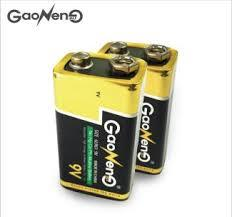

In [21]:
input_image

In [22]:
input_tensor = data_transform(input_image)
input_batch = input_tensor.unsqueeze(0) 

In [23]:
input_tensor.shape

torch.Size([3, 224, 224])

In [24]:
model.to('cpu')
with torch.no_grad():
    output = model(input_batch)
print(output[0].shape)
prob = F.softmax(output[0], dim=0)
indexs = torch.argsort(-prob)
topk = 1
for i in range(topk):
    print("index:", indexs[i].item(), " prob: ", prob[indexs[i]])

torch.Size([40])
index: 0  prob:  tensor(0.9991)
